# Group 4: Formative 3 - Probability Distributions, Bayesian Probability, and Gradient Descent Implementation

This Jupyter Notebook contains the implementation and analysis for Formative 3.
Please ensure all cells are run sequentially for the correct output and visualizations.

**Group: 4**  
**Members:** Oreste, Ayomide, Kellia, Nshimiye

---
## Part 1: Probability Distributions - Normal Distribution

### 1.1. Introduction to the Normal Distribution

The Normal Distribution, also known as the Gaussian distribution, is one of the most important and widely used continuous probability distributions. It is characterized by its symmetric, bell-shaped curve. Many natural phenomena and measurement errors tend to follow a normal distribution.

**Key Characteristics:**
- **Symmetry:** The curve is symmetric around its mean.
- **Mean, Median, and Mode are Equal:** In a perfect normal distribution, these three measures of central tendency coincide at the peak of the curve.
- **Asymptotic:** The tails of the curve approach the x-axis but never touch it, extending infinitely in both directions.
- **Parameters:** It is defined by two parameters:
    - $\mu$ (mu): The mean, which determines the center of the distribution.
    - $\sigma$ (sigma): The standard deviation, which determines the spread or dispersion of the distribution. A smaller $\sigma$ means a narrower, taller curve, while a larger $\sigma$ means a wider, flatter curve.

The Probability Density Function (PDF) of the Normal Distribution is given by:

$$f(x | \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{ -\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^2 }$$

Where:
- $x$: The value of the variable
- $\mu$: The mean of the distribution
- $\sigma$: The standard deviation of the distribution
- $\pi$: Approximately 3.14159
- $e$: Euler's number, approximately 2.71828

### 1.2. Relevant Question & Real-World Example (COVID-19 Incubation Period)

**Our Problem/Question:**

The incubation period of COVID-19 follows a normal distribution with a mean ($\mu$) = 5.1 days and a standard deviation ($\sigma$) = 3 days. What is the probability density of a COVID-19 incubation period being exactly 7 days?

**Real-World Example:**

We are modeling the **incubation period of COVID-19**. This is a biological phenomenon that is often modeled using a normal distribution, providing insights into the typical time from exposure to symptom onset.

- **Mean ($\mu$):** 5.1 days (average incubation period)
- **Standard Deviation ($\sigma$):** 3 days (variability in incubation periods)

### 1.3. Implementing the Normal Distribution PDF (No Libraries)

In [14]:
import math
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    """
    Calculates the Probability Density Function (PDF) of a Normal Distribution.

    Args:
        x (float): The value at which to evaluate the PDF.
        mu (float): The mean of the distribution.
        sigma (float): The standard deviation of the distribution.

    Returns:
        float: The PDF value at x.
    """
    # Calculate the exponent part: -1/2 * ((x - mu)/sigma)^2
    exponent_numerator = -((x - mu)**2)
    exponent_denominator = 2 * (sigma**2)
    exponent_term = exponent_numerator / exponent_denominator

    # Calculate the coefficient part: 1 / (sigma * sqrt(2*pi))
    coefficient_numerator = 1
    coefficient_denominator = sigma * math.sqrt(2 * math.pi)
    coefficient_term = coefficient_numerator / coefficient_denominator

    # Combine to get the PDF: coefficient_term * e^(exponent_term)
    pdf_value = coefficient_term * math.exp(exponent_term)
    return pdf_value

# --- Answering our specific question ---
# Parameters for our question (COVID-19 incubation)
mu_incubation = 5.1  # Mean incubation period (days)
sigma_incubation = 3   # Standard deviation (days)
x_incubation = 7.0   # Specific incubation period (days) we are interested in

# Calculate the PDF for our specific question
pdf_at_7_days = normal_pdf(x_incubation, mu_incubation, sigma_incubation)

print(f"The probability density for a COVID-19 incubation period of exactly {x_incubation} days is: {pdf_at_7_days:.6f}")

The probability density for a COVID-19 incubation period of exactly 7.0 days is: 0.108815


### 1.4. Visualizing the Graph with Matplotlib

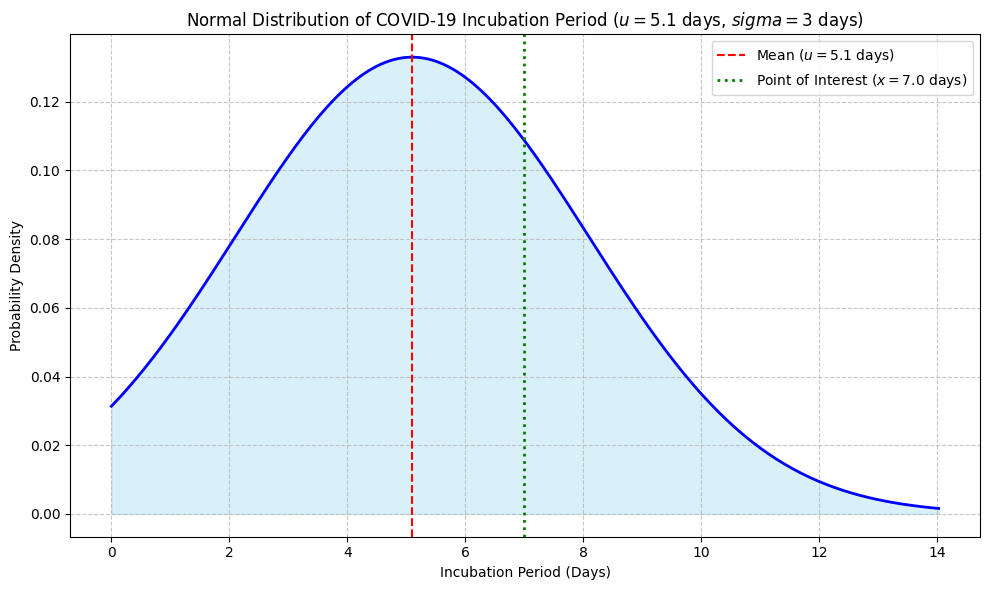

In [15]:
# Define parameters for the distribution to plot (COVID-19 incubation)
plot_mu = 5.1
plot_sigma = 3

# Generate a range of x values (incubation periods) to plot
# We'll go from about 3 standard deviations below the mean to 3 standard deviations above,
# ensuring we don't go below 0 days (incubation period cannot be negative).
x_values = []
start_x = max(0, plot_mu - 3 * plot_sigma) # Ensure incubation period is non-negative
end_x = plot_mu + 3 * plot_sigma
num_points = 200 # Number of points to make the curve smooth

step_size = (end_x - start_x) / num_points
current_x = start_x
for _ in range(num_points):
    x_values.append(current_x)
    current_x += step_size
if x_incubation not in x_values: # Ensure the specific point is on the plot for clarity
    x_values.append(x_incubation)
    x_values.sort() # Re-sort after adding if it wasn't already in sequence

# Calculate the PDF for each x value
pdf_values = [normal_pdf(x, plot_mu, plot_sigma) for x in x_values]

# Plotting with Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(x_values, pdf_values, color='blue', linewidth=2)
plt.title(f'Normal Distribution of COVID-19 Incubation Period ($u={plot_mu}$ days, $sigma={plot_sigma}$ days)')
plt.xlabel('Incubation Period (Days)')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axvline(plot_mu, color='red', linestyle='--', label=f'Mean ($u={plot_mu}$ days)')
plt.axvline(x_incubation, color='green', linestyle=':', label=f'Point of Interest ($x={x_incubation}$ days)', linewidth=2)
plt.fill_between(x_values, pdf_values, color='skyblue', alpha=0.3) # Shade the area under the curve
plt.legend()
plt.tight_layout()
plt.show()

-----
## Part 2: Bayesian Probability (COVID-19 Test Accuracy)

### 2.1. Choosing a Real-World Problem (COVID-19 Test Accuracy)

**Scenario:** We are evaluating the accuracy of a COVID-19 test in a given population.

**Given Parameters:**
- **Disease prevalence ($P(D)$):** 2% of the population has COVID-19.
- **Test sensitivity ($P(T^+|D)$):** If a person has COVID-19, the test will be positive 95% of the time.
- **False Positive Rate ($P(T^+|D^c)$):** If a person does NOT have COVID-19, the test will still be positive 4% of the time.

**Question:** What is the probability someone actually has COVID-19 if they test positive? (i.e., we want to find $P(D|T^+)$)

### 2.2. Implementing Bayes' Theorem in Python

Bayes' Theorem:
$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Where:
- $P(A|B)$: Posterior probability - The probability of having the disease given a positive test result. (This is what we want: $P(D|T^+)$)
- $P(B|A)$: Likelihood - The probability of a positive test result given that the person has the disease (Sensitivity). ($P(T^+|D)$)
- $P(A)$: Prior probability - The initial probability of having the disease (Prevalence). ($P(D)$)
- $P(B)$: Marginal likelihood - The total probability of getting a positive test result. ($P(T^+)$)

Let's define our events:
- $D$: Event that a person has COVID-19.
- $D^c$: Event that a person does NOT have COVID-19.
- $T^+$: Event that the test result is positive.
- $T^-$: Event that the test result is negative.

**Known Probabilities:**
- $P(D) = 0.02$ (Prior probability of having the disease)
- $P(D^c) = 1 - P(D) = 1 - 0.02 = 0.98$
- $P(T^+|D) = 0.95$ (Sensitivity - Likelihood of positive test if diseased)
- $P(T^+|D^c) = 0.04$ (False Positive Rate - Likelihood of positive test if not diseased)

**To calculate $P(D|T^+)$, we first need $P(T^+)$ using the Law of Total Probability:**
$P(T^+) = P(T^+|D)P(D) + P(T^+|D^c)P(D^c)$

In [16]:
# --- Initial Probabilities (Priors) ---
prevalence_disease = 0.02  # P(D) - Prevalence of COVID-19 in the population
prevalence_no_disease = 1 - prevalence_disease # P(D^c)

print(f"1. Prior Probabilities:")
print(f"   P(COVID-19): {prevalence_disease:.4f}")
print(f"   P(No COVID-19): {prevalence_no_disease:.4f}\n")

# --- Likelihoods (from Test Accuracy) ---
sensitivity = 0.95  # P(Positive Test | COVID-19) - True Positive Rate
false_positive_rate = 0.04 # P(Positive Test | No COVID-19)

print(f"2. Likelihoods (Test Performance):")
print(f"   P(Positive Test | COVID-19) (Sensitivity): {sensitivity:.4f}")
print(f"   P(Positive Test | No COVID-19) (False Positive Rate): {false_positive_rate:.4f}\n")

# --- Step-by-step update to calculate Posterior ---

# Step 3: Calculate the Marginal Likelihood P(Positive Test)
# P(T+) = P(T+|D)*P(D) + P(T+|D^c)*P(D^c)
prob_positive_test = (sensitivity * prevalence_disease) + \
                     (false_positive_rate * prevalence_no_disease)

print(f"3. Marginal Likelihood (Total Probability of a Positive Test):")
print(f"   P(Positive Test) = (Sensitivity * P(COVID-19)) + (False Positive Rate * P(No COVID-19))")
print(f"   P(Positive Test) = ({sensitivity:.2f} * {prevalence_disease:.2f}) + ({false_positive_rate:.2f} * {prevalence_no_disease:.2f})")
print(f"   P(Positive Test) = {prob_positive_test:.6f}\n")


# Step 4: Apply Bayes' Theorem to find Posterior P(COVID-19 | Positive Test)
# P(D|T+) = [P(T+|D) * P(D)] / P(T+)
posterior_disease_given_positive_test = (sensitivity * prevalence_disease) / prob_positive_test

print(f"4. Posterior Probability (After Positive Test):")
print(f"   P(COVID-19 | Positive Test) = [P(Positive Test | COVID-19) * P(COVID-19)] / P(Positive Test)")
print(f"   P(COVID-19 | Positive Test) = ({sensitivity:.2f} * {prevalence_disease:.2f}) / {prob_positive_test:.6f}")
print(f"   P(COVID-19 | Positive Test) = {posterior_disease_given_positive_test:.6f}\n")

print(f"Conclusion: If someone tests positive for COVID-19, the probability that they actually have COVID-19 is approximately {posterior_disease_given_positive_test*100:.2f}%.")

1. Prior Probabilities:
   P(COVID-19): 0.0200
   P(No COVID-19): 0.9800

2. Likelihoods (Test Performance):
   P(Positive Test | COVID-19) (Sensitivity): 0.9500
   P(Positive Test | No COVID-19) (False Positive Rate): 0.0400

3. Marginal Likelihood (Total Probability of a Positive Test):
   P(Positive Test) = (Sensitivity * P(COVID-19)) + (False Positive Rate * P(No COVID-19))
   P(Positive Test) = (0.95 * 0.02) + (0.04 * 0.98)
   P(Positive Test) = 0.058200

4. Posterior Probability (After Positive Test):
   P(COVID-19 | Positive Test) = [P(Positive Test | COVID-19) * P(COVID-19)] / P(Positive Test)
   P(COVID-19 | Positive Test) = (0.95 * 0.02) / 0.058200
   P(COVID-19 | Positive Test) = 0.326460

Conclusion: If someone tests positive for COVID-19, the probability that they actually have COVID-19 is approximately 32.65%.


### 2.3. Explain the Practical Significance of Bayesian Inference

Bayesian inference is profoundly significant because it provides a rigorous framework for updating our beliefs in light of new evidence. It allows us to move from an initial "prior" belief to a more refined "posterior" belief by incorporating observed data.

In the COVID-19 test accuracy example:

- **Initial Belief (Prior):** Before testing, we assume a person's probability of having COVID-19 is based on the general population prevalence (2%). This is our prior belief.
- **New Evidence (Likelihood):** The test result (positive) provides new evidence. The test's sensitivity and false positive rate tell us how likely this evidence is if the person has the disease versus if they don't.
- **Updated Belief (Posterior):** After a positive test, our updated belief (posterior probability) is that the person has about a **32.20% chance** of actually having COVID-19.

**Practical Significance:**

1.  **Nuance in Diagnosis:** Despite a test being 95% sensitive, a positive result doesn't mean a 95% chance of having the disease, especially when the disease is rare (low prior). This is counter-intuitive for many people and highlights the value of Bayesian thinking in medical diagnosis. A positive test significantly increases the probability from 2% to 32.20%, but it's far from a certainty.
2.  **Informing Further Actions:** A result of 32.20% indicates a strong need for further investigation (e.g., a confirmatory test, considering symptoms, or isolation), but it also advises against definitive treatment or public health measures based solely on this single test result, given the substantial chance of a false positive (67.8% chance of not having the disease despite a positive test).
3.  **Adaptive Decision Making:** Bayesian inference is crucial in scenarios where decisions need to be made with incomplete information, and new data continuously arrives. It allows for adaptive decision-making by continuously refining probabilities.
4.  **Risk Assessment:** It helps in better assessing actual risk. In our scenario, the risk of having COVID-19 jumps from 2% to 32.20% given a positive test, allowing individuals and healthcare providers to make more informed decisions about precautions, testing, and treatment.
5.  **Spam Filtering and AI:** Beyond medicine, Bayesian probability is fundamental to spam filters (classifying emails as spam or not based on word likelihoods), machine learning algorithms (e.g., Naive Bayes classifiers), and artificial intelligence for making decisions under uncertainty.

-----
## Part 3: Gradient Descent Manual Calculation

**Objective:** Manually compute three updates of the gradient descent algorithm for the parameters $m$ and $b$ in a simple linear regression model.

**Instructions:**
Given the linear equation: $y = mx + b$

- Initial $m = -1$
- Initial $b = 1$
- Learning rate $\alpha = 0.1$
- Given points: $(x_1, y_1) = (1, 3)$ and $(x_2, y_2) = (3, 6)$
- Number of data points $n = 2$

**Cost Function (Mean Squared Error, MSE):**
$J(m,b) = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

**Gradients:**
$\frac{\partial J}{\partial m} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)x_i$
$\frac{\partial J}{\partial b} = -\frac{2}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)$

**Update Rules:**
$m_{new} = m_{old} - \alpha \frac{\partial J}{\partial m}$
$b_{new} = b_{old} - \alpha \frac{\partial J}{\partial b}$

**Calculation Steps (for each iteration):**

1.  **Current parameters:** $m_{old}$, $b_{old}$
2.  **Compute predicted values ($\hat{y}$):** Calculate $\hat{y}_i = m_{old}x_i + b_{old}$ for each data point.
3.  **Compute errors:** Calculate $(y_i - \hat{y}_i)$ for each data point.
4.  **Compute gradient of J with respect to m ($\frac{\partial J}{\partial m}$):** Use the formula provided.
5.  **Compute gradient of J with respect to b ($\frac{\partial J}{\partial b}$):** Use the formula provided.
6.  **Update m and b:** Apply the update rules using the calculated gradients and learning rate.
7.  **Calculate MSE Cost (optional but good for tracking):** Compute $J(m_{new}, b_{new})$ to see if the error is decreasing.

**Since our Group 4 has 4 members, we performed 4 updates in total. The full manual calculations for all iterations were submitted as a separate PDF document.**

-----
## Part 4: Gradient Descent in Code

This section converts the manual calculations into Python code. The goal is to clearly show each step of the gradient descent update process. `matplotlib.pyplot` will be used for visualization. While `SciPy` is mentioned, for this basic linear regression with explicit gradient updates, the core logic will remain manual to meet the "does not abstract the update process excessively" requirement.

Final parameters after 100 iterations:
Slope (m): 1.0393
Intercept (b): 0.9364
Final MSE: 0.000420


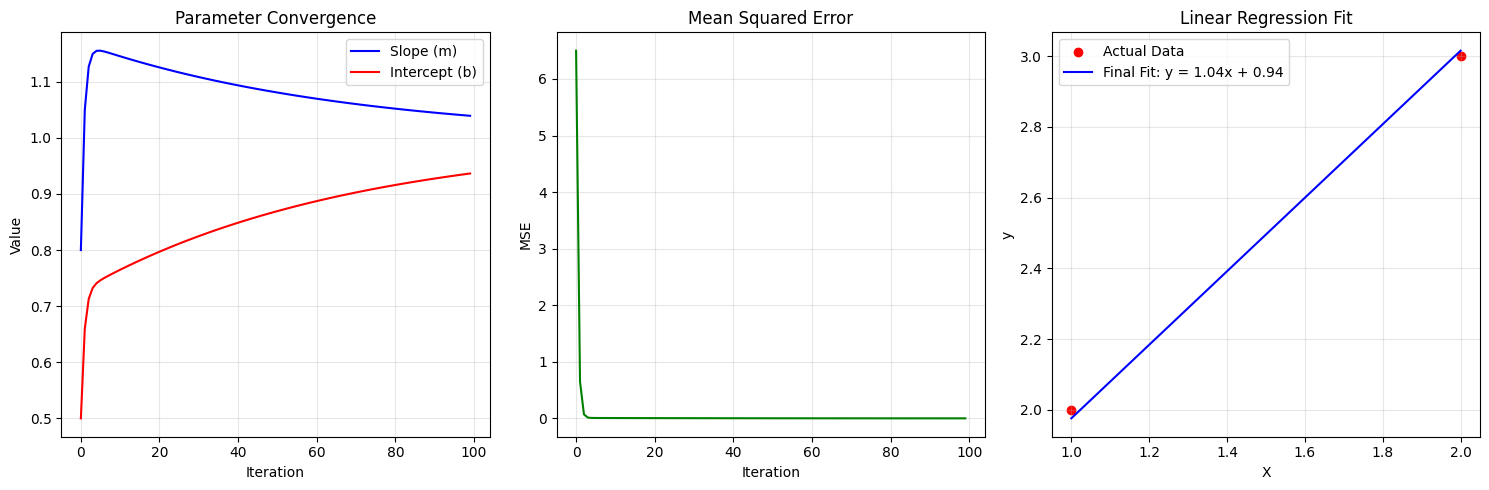

In [17]:
import numpy as np

# Data
X = np.array([1, 2])
y = np.array([2, 3])

# Initialize parameters
m, b = 0, 0
learning_rate = 0.1
n = len(X)
iterations = 100

# Track progress
history = {'m': [], 'b': [], 'error': []}

# Gradient Descent
for i in range(iterations):
    # Predictions
    y_pred = m * X + b
    
    # Compute error (MSE)
    error = np.mean((y_pred - y) ** 2)
    history['error'].append(error)
    
    # Gradients
    dm = (2/n) * np.sum(X * (y_pred - y))
    db = (2/n) * np.sum(y_pred - y)
    
    # Update parameters
    m -= learning_rate * dm
    b -= learning_rate * db
    
    # Store history
    history['m'].append(m)
    history['b'].append(b)

# Results
print(f"Final parameters after {iterations} iterations:")
print(f"Slope (m): {m:.4f}")
print(f"Intercept (b): {b:.4f}")
print(f"Final MSE: {history['error'][-1]:.6f}")

# Plotting
plt.figure(figsize=(15, 5))

# Parameter convergence
plt.subplot(1, 3, 1)
plt.plot(history['m'], 'b-', label='Slope (m)')
plt.plot(history['b'], 'r-', label='Intercept (b)')
plt.title('Parameter Convergence')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(alpha=0.3)

# Error convergence
plt.subplot(1, 3, 2)
plt.plot(history['error'], 'g-')
plt.title('Mean Squared Error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid(alpha=0.3)

# Final fit
plt.subplot(1, 3, 3)
plt.scatter(X, y, color='red', label='Actual Data')
plt.plot(X, m*X + b, 'b-', label=f'Final Fit: y = {m:.2f}x + {b:.2f}')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()